In [72]:
# import dependencies
from path import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

%matplotlib inline

In [9]:
# load in the files
file = Path("../Resources/merged_covid.csv")
file1= Path("../Resources/government_regulation.csv")
file2= Path("../Resources/covid_stats.csv")
file3= Path("../Resources/merged_covid_stats_population.csv")

# read the files
df= pd.read_csv(file)
df_gov=pd.read_csv(file1)
df_st=pd.read_csv(file2)
df_pop=pd.read_csv(file3)


In [3]:
# Check merged_covid.csv
print(df.dtypes)
print(df.shape)

# Display df
df.head()

date_updated                        object
iso_code                            object
continent                           object
location                            object
new_cases                          float64
new_deaths                         float64
new_tests                          float64
total_cases_updated                float64
total_deaths_updated               float64
total_tests_updated                float64
StringencyIndex_updated            float64
StringencyLegacyIndex_updated      float64
GovernmentResponseIndex_updated    float64
ContainmentHealthIndex_updated     float64
EconomicSupportIndex_updated       float64
dtype: object
(48591, 15)


,date_updated,iso_code,continent,location,new_cases,new_deaths,new_tests,total_cases_updated,total_deaths_updated,total_tests_updated,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
0,2020-03-13,ABW,North America,Aruba,2.0,0.0,0.0,2.0,0.0,0.0,0.00,0.00,2.56,3.03,0.0
1,2020-03-19,ABW,North America,Aruba,0.0,0.0,0.0,2.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0
2,2020-03-20,ABW,North America,Aruba,2.0,0.0,0.0,4.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0
3,2020-03-21,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0
4,2020-03-22,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0


In [4]:
# Check df_gov
print(df_gov.shape)
print(df_gov.dtypes)

# Display df
df_gov.head()



(57340, 8)
Date_updated                        object
CountryName                         object
CountryCode                         object
StringencyIndex_updated            float64
StringencyLegacyIndex_updated      float64
GovernmentResponseIndex_updated    float64
ContainmentHealthIndex_updated     float64
EconomicSupportIndex_updated       float64
dtype: object


,Date_updated,CountryName,CountryCode,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
0,2020-01-01,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
1,2020-01-02,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,Aruba,ABW,0.0,0.0,0.0,0.0,0.0


In [5]:
# Check df_gov
print(df_st.shape)
print(df_st.dtypes)

# Display df
df_st.head()

(34927, 10)
date_updated             object
iso_code                 object
continent                object
location                 object
new_cases               float64
new_deaths              float64
new_tests               float64
total_cases_updated     float64
total_deaths_updated    float64
total_tests_updated     float64
dtype: object


,date_updated,iso_code,continent,location,new_cases,new_deaths,new_tests,total_cases_updated,total_deaths_updated,total_tests_updated
0,2020-03-13,ABW,North America,Aruba,2.0,0.0,0.0,2.0,0.0,0.0
1,2020-03-19,ABW,North America,Aruba,0.0,0.0,0.0,2.0,0.0,0.0
2,2020-03-20,ABW,North America,Aruba,2.0,0.0,0.0,4.0,0.0,0.0
3,2020-03-21,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0
4,2020-03-22,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0


In [6]:
# check merged df for null values.
df.describe()

,new_cases,new_deaths,new_tests,total_cases_updated,total_deaths_updated,total_tests_updated,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
count,48591.000000,48591.000000,4.859100e+04,4.840100e+04,48401.000000,4.859100e+04,47852.000000,47852.000000,47731.000000,47852.000000,46911.000000
mean,6963.026137,216.707436,9.649910e+04,4.669529e+05,19638.592694,5.972463e+06,54.998629,61.056228,53.631534,55.611587,43.229200
std,15758.304949,520.361894,2.307435e+05,1.199741e+06,44926.853340,1.649185e+07,28.711626,29.466818,25.338390,26.103126,34.062708
min,-2461.000000,-1918.000000,-3.743000e+03,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000e+00,5.300000e+01,0.000000,0.000000e+00,36.110000,45.240000,41.670000,41.670000,0.000000
50%,34.000000,0.000000,0.000000e+00,1.965000e+03,45.000000,1.224000e+03,62.040000,70.240000,62.180000,63.260000,50.000000
75%,1075.000000,30.000000,1.346800e+04,7.240000e+04,2267.000000,8.247120e+05,77.780000,83.330000,72.120000,75.000000,75.000000
max,78761.000000,4928.000000,1.194086e+06,5.997163e+06,183069.000000,8.389842e+07,100.000000,100.000000,96.150000,100.000000,100.000000


In [11]:
# Check merged df with pop df.
print(df_pop.shape)
print(df_pop.dtypes)
df_pop.head()

(48591, 18)
date_updated                        object
iso_code                            object
continent                           object
location                            object
new_cases                          float64
new_deaths                         float64
new_tests                          float64
population                         float64
population_density                 float64
median_age                         float64
total_cases_updated                float64
total_deaths_updated               float64
total_tests_updated                float64
StringencyIndex_updated            float64
StringencyLegacyIndex_updated      float64
GovernmentResponseIndex_updated    float64
ContainmentHealthIndex_updated     float64
EconomicSupportIndex_updated       float64
dtype: object


,date_updated,iso_code,continent,location,new_cases,new_deaths,new_tests,population,population_density,median_age,total_cases_updated,total_deaths_updated,total_tests_updated,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
0,2020-03-13,ABW,North America,Aruba,2.0,0.0,0.0,106766.0,584.8,41.2,2.0,0.0,0.0,0.00,0.00,2.56,3.03,0.0
1,2020-03-19,ABW,North America,Aruba,0.0,0.0,0.0,106766.0,584.8,41.2,2.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0
2,2020-03-20,ABW,North America,Aruba,2.0,0.0,0.0,106766.0,584.8,41.2,4.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0
3,2020-03-21,ABW,North America,Aruba,0.0,0.0,0.0,106766.0,584.8,41.2,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0
4,2020-03-22,ABW,North America,Aruba,0.0,0.0,0.0,106766.0,584.8,41.2,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0


In [13]:
# Create a df to test impact of some features on 'total deaths'
df_death_ml=df_pop[['population','population_density','median_age','total_cases_updated','StringencyIndex_updated','total_deaths_updated']]
df_death_ml

,population,population_density,median_age,total_cases_updated,StringencyIndex_updated,total_deaths_updated
0,106766.0,584.800,41.2,2.0,0.00,0.0
1,106766.0,584.800,41.2,2.0,33.33,0.0
2,106766.0,584.800,41.2,4.0,33.33,0.0
3,106766.0,584.800,41.2,4.0,44.44,0.0
4,106766.0,584.800,41.2,4.0,44.44,0.0
...,...,...,...,...,...,...
48586,14862927.0,42.729,19.6,6251.0,80.56,179.0
48587,14862927.0,42.729,19.6,6292.0,80.56,189.0
48588,14862927.0,42.729,19.6,6388.0,80.56,195.0
48589,14862927.0,42.729,19.6,6406.0,80.56,196.0


In [79]:
df_death_ml.describe()

,population,population_density,median_age,total_cases_updated,StringencyIndex_updated,total_deaths_updated
count,4.507500e+04,45075.000000,45075.000000,4.507500e+04,45075.000000,45075.000000
mean,1.331393e+08,164.984718,33.564506,5.013390e+05,55.194990,21085.630682
std,1.938554e+08,606.333294,8.321268,1.236277e+06,28.961111,46226.478125
min,9.834000e+04,1.980000,15.100000,0.000000e+00,0.000000,0.000000
25%,7.132530e+06,35.608000,27.600000,8.200000e+01,36.110000,1.000000
50%,3.481387e+07,46.754000,38.300000,2.880000e+03,62.960000,61.000000
75%,3.310026e+08,127.657000,38.300000,9.708100e+04,78.240000,4223.000000
max,1.439324e+09,7915.731000,48.200000,5.997163e+06,100.000000,183069.000000


In [15]:
# Check to make sure dtypes are appropriate .
df_death_ml.dtypes

population                 float64
population_density         float64
median_age                 float64
total_cases_updated        float64
StringencyIndex_updated    float64
total_deaths_updated       float64
dtype: object

In [29]:
# Check shape before dropping na
df_death_ml.shape

(48591, 6)

In [31]:
# Drop rows with null values
df_death_ml=df_death_ml.dropna(how='any')
df_death_ml.shape

(45075, 6)

In [14]:
# Create a df to test impact of some features on 'total cases'
df_cases_ml=df_pop[['population','population_density','median_age','ContainmentHealthIndex_updated','StringencyIndex_updated','total_cases_updated']]
df_cases_ml

,population,population_density,median_age,ContainmentHealthIndex_updated,StringencyIndex_updated,total_cases_updated
0,106766.0,584.800,41.2,3.03,0.00,2.0
1,106766.0,584.800,41.2,34.85,33.33,2.0
2,106766.0,584.800,41.2,34.85,33.33,4.0
3,106766.0,584.800,41.2,43.94,44.44,4.0
4,106766.0,584.800,41.2,43.94,44.44,4.0
...,...,...,...,...,...,...
48586,14862927.0,42.729,19.6,73.48,80.56,6251.0
48587,14862927.0,42.729,19.6,73.48,80.56,6292.0
48588,14862927.0,42.729,19.6,73.48,80.56,6388.0
48589,14862927.0,42.729,19.6,73.48,80.56,6406.0


## Predicting Number of Deaths- with NN Model

In [80]:
# create features(X) and target(y) sets
X = df_death_ml.drop(['total_deaths_updated'],axis=1).values

y = df_death_ml['total_deaths_updated'].values
y = y.reshape(-1,1)

In [81]:
# Check shape for num of features
X.shape

(45075, 5)

In [82]:
# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 11        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
42821/42821 [==============================] - 3s 70us/sample - loss: 2584543375.7710 - mean_squared_error: 2584543488.0000
Epoch 2/100
42821/42821 [==============================] - 3s 72us/sample - loss: 2575582240.1052 - mean_squared_error: 2575582208.0000
Epoch 3/100
42821/42821 [==============================] - 3s 69us/sample - loss: 2558721405.9543 - mean_squared_error: 2558723328.0000
Epoch 4/100
42821/42821 [==============================] - 3s 72us/sample - loss: 2536158807.0627 - mean_square

42821/42821 [==============================] - 3s 63us/sample - loss: 254951489.0387 - mean_squared_error: 254951552.0000
Epoch 57/100
42821/42821 [==============================] - 3s 64us/sample - loss: 241425418.5832 - mean_squared_error: 241425504.0000
Epoch 58/100
42821/42821 [==============================] - 3s 65us/sample - loss: 228859140.6374 - mean_squared_error: 228858960.0000
Epoch 59/100
42821/42821 [==============================] - 3s 66us/sample - loss: 217322406.5303 - mean_squared_error: 217322368.0000
Epoch 60/100
42821/42821 [==============================] - 3s 66us/sample - loss: 206652167.5854 - mean_squared_error: 206652208.0000
Epoch 61/100
42821/42821 [==============================] - 3s 69us/sample - loss: 196816530.1437 - mean_squared_error: 196816512.0000
Epoch 62/100
42821/42821 [==============================] - 3s 67us/sample - loss: 187859496.1414 - mean_squared_error: 187859440.0000
Epoch 63/100
42821/42821 [==============================] - 3s 77us/

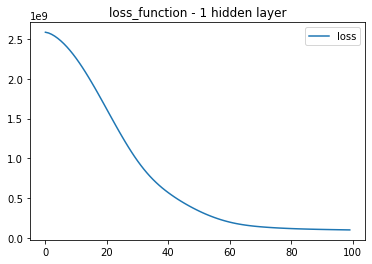

0.953644293433293
0.9553674910225809


NameError: name 'y_pred' is not defined

In [83]:
# define model - shallow neural net
number_hidden_nodes = 10
number_input_features = 5

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 16        
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
42821/42821 [==============================] - 1s 30us/sample - loss: 2571263151.9085 - mean_squared_error: 2571264256.0000
Epoch 2/100
42821/42821 [==============================] - 1s 28us/sample - loss: 2555205696.9691 - mean_squared_error: 2555206400.0000
Epoch 3/100
42821/42821 [==============================] - 1s 29us/sample - loss: 2526090575.0878 - mean_squared_error: 2526089984.0000
Epoch 4/100
42821/42821 [==============================] - 1s 29us/sample - loss: 2487412726.1581 - mean_squar

42821/42821 [==============================] - 1s 23us/sample - loss: 125108244.2995 - mean_squared_error: 125108336.0000
Epoch 57/100
42821/42821 [==============================] - 1s 24us/sample - loss: 121947116.7973 - mean_squared_error: 121947216.0000
Epoch 58/100
42821/42821 [==============================] - 1s 27us/sample - loss: 119054150.7172 - mean_squared_error: 119054184.0000
Epoch 59/100
42821/42821 [==============================] - 1s 26us/sample - loss: 116453072.7932 - mean_squared_error: 116453080.0000
Epoch 60/100
42821/42821 [==============================] - 1s 23us/sample - loss: 114097006.8290 - mean_squared_error: 114097024.0000
Epoch 61/100
42821/42821 [==============================] - 1s 23us/sample - loss: 111946361.9366 - mean_squared_error: 111946464.0000
Epoch 62/100
42821/42821 [==============================] - 1s 25us/sample - loss: 109962629.8237 - mean_squared_error: 109962632.0000
Epoch 63/100
42821/42821 [==============================] - 1s 27us/

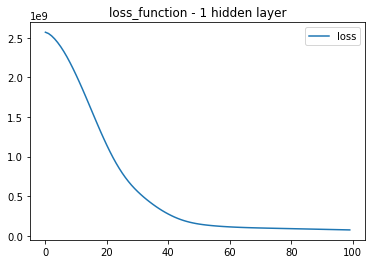

0.9655914668344224
0.9686704447547602


In [42]:
# define model - shallow neural net with 3X
number_hidden_nodes = 15
number_input_features = 5

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 20)                120       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 21        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
42821/42821 [==============================] - 1s 30us/sample - loss: 2570261753.5068 - mean_squared_error: 2570260736.0000
Epoch 2/100
42821/42821 [==============================] - 1s 30us/sample - loss: 2547300409.7848 - mean_squared_error: 2547299328.0000
Epoch 3/100
42821/42821 [==============================] - 1s 29us/sample - loss: 2506087410.8403 - mean_squared_error: 2506088192.0000
Epoch 4/100
42821/42821 [==============================] - 1s 30us/sample - loss: 2452022851.5315 - mean_squa

42821/42821 [==============================] - 1s 27us/sample - loss: 112688158.9889 - mean_squared_error: 112688200.0000
Epoch 57/100
42821/42821 [==============================] - 1s 26us/sample - loss: 111224250.9453 - mean_squared_error: 111224280.0000
Epoch 58/100
42821/42821 [==============================] - 1s 27us/sample - loss: 109900938.6094 - mean_squared_error: 109900960.0000
Epoch 59/100
42821/42821 [==============================] - 1s 27us/sample - loss: 108700345.8972 - mean_squared_error: 108700352.0000
Epoch 60/100
42821/42821 [==============================] - 1s 26us/sample - loss: 107597077.4644 - mean_squared_error: 107597096.0000
Epoch 61/100
42821/42821 [==============================] - 1s 27us/sample - loss: 106592756.4117 - mean_squared_error: 106592648.0000
Epoch 62/100
42821/42821 [==============================] - 1s 27us/sample - loss: 105651713.1519 - mean_squared_error: 105651712.0000
Epoch 63/100
42821/42821 [==============================] - 1s 27us/

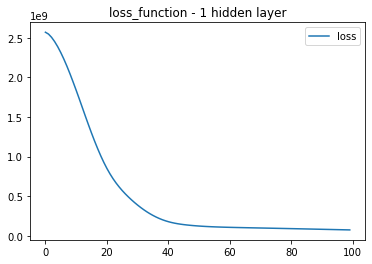

0.9654201006357787
0.968499563413501


In [44]:
# conclusion: did not add value
# define model - shallow neural net with 4X
number_hidden_nodes = 20
number_input_features = 5

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

## Deep Neural Network

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_40 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 6         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
40567/40567 [==============================] - 2s 41us/sample - loss: 1792068502756.5173 - mean_squared_error: 1792068288512.0000
Epoch 2/100
40567/40567 [==============================] - 2s 43us/sample - loss: 1789275102941.6140 - mean_squared_error: 1789275144192.0000
Epoch 3/100
40567/40567 [==============================] - 2s 44us/sample - loss: 1781083927806.5676 

40567/40567 [==============================] - 2s 38us/sample - loss: 88660276182.5271 - mean_squared_error: 88660320256.0000
Epoch 54/100
40567/40567 [==============================] - 2s 40us/sample - loss: 85984772815.6044 - mean_squared_error: 85984788480.0000
Epoch 55/100
40567/40567 [==============================] - 2s 39us/sample - loss: 83718651089.3840 - mean_squared_error: 83718586368.0000
Epoch 56/100
40567/40567 [==============================] - 2s 37us/sample - loss: 81747979301.2322 - mean_squared_error: 81747968000.0000
Epoch 57/100
40567/40567 [==============================] - 2s 38us/sample - loss: 80027375917.2403 - mean_squared_error: 80027443200.0000
Epoch 58/100
40567/40567 [==============================] - 1s 36us/sample - loss: 78478321442.6260 - mean_squared_error: 78478409728.0000
Epoch 59/100
40567/40567 [==============================] - 1s 36us/sample - loss: 77101738225.3658 - mean_squared_error: 77101744128.0000
Epoch 60/100
40567/40567 [==============

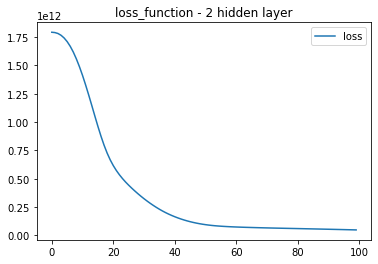

0.9683579388728787
0.9661456782422982


NameError: name 'accuracy_score' is not defined

In [71]:
# Define the model - deep neural net
number_input_features = 5
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 2 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))
# print(accuracy_score(y_test, y_pred))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 6         
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
42821/42821 [==============================] - 1s 34us/sample - loss: 2537087609.7811 - mean_squared_error: 2537087232.0000
Epoch 2/100
42821/42821 [==============================] - 1s 34us/sample - loss: 2117705369.3821 - mean_squared_error: 2117704576.0000
Epoch 3/100
42821/42821 [==============================] - 1s 33us/sample - loss: 1274138997.4153 - mean_squared_

42821/42821 [==============================] - 1s 32us/sample - loss: 17670267.1167 - mean_squared_error: 17670272.0000
Epoch 57/100
42821/42821 [==============================] - 2s 38us/sample - loss: 17573480.5654 - mean_squared_error: 17573482.0000
Epoch 58/100
42821/42821 [==============================] - 1s 33us/sample - loss: 17483591.4175 - mean_squared_error: 17483586.0000
Epoch 59/100
42821/42821 [==============================] - 1s 33us/sample - loss: 17395395.8565 - mean_squared_error: 17395408.0000
Epoch 60/100
42821/42821 [==============================] - 2s 39us/sample - loss: 17304522.6537 - mean_squared_error: 17304510.0000
Epoch 61/100
42821/42821 [==============================] - 2s 38us/sample - loss: 17219873.1725 - mean_squared_error: 17219876.0000
Epoch 62/100
42821/42821 [==============================] - 1s 33us/sample - loss: 17131147.3283 - mean_squared_error: 17131140.0000
Epoch 63/100
42821/42821 [==============================] - 1s 32us/sample - loss:

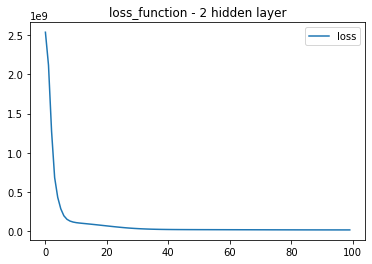

0.993091935379856
0.993789172469814


In [45]:
# Define the model - deep neural net 3X
number_input_features = 5
hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 5

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 2 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

### Deep Neural Network with three hidden layers

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 6         
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
42821/42821 [==============================] - 1s 35us/sample - loss: 2547313513.3648 - mean_squared_error: 2547315968.0000
Epoch 2/100
42821/42821 [==============================] - 1s 34us/sample - loss: 2227563301.3412 - mean_squared_error: 2227565568.0000
Epoch 3/100
42821/42821 [==============================] - 1s 33us/sample - loss: 1566392890.4177 - mean_squared_

42821/42821 [==============================] - 1s 33us/sample - loss: 21273078.2286 - mean_squared_error: 21273080.0000
Epoch 56/100
42821/42821 [==============================] - 1s 32us/sample - loss: 21099757.6594 - mean_squared_error: 21099756.0000
Epoch 57/100
42821/42821 [==============================] - 1s 32us/sample - loss: 20922825.7866 - mean_squared_error: 20922842.0000
Epoch 58/100
42821/42821 [==============================] - 1s 32us/sample - loss: 20760273.1205 - mean_squared_error: 20760258.0000
Epoch 59/100
42821/42821 [==============================] - 1s 33us/sample - loss: 20577709.3570 - mean_squared_error: 20577688.0000
Epoch 60/100
42821/42821 [==============================] - 1s 33us/sample - loss: 20408220.5829 - mean_squared_error: 20408198.0000
Epoch 61/100
42821/42821 [==============================] - 1s 32us/sample - loss: 20215046.4148 - mean_squared_error: 20215032.0000
Epoch 62/100
42821/42821 [==============================] - 1s 32us/sample - loss:

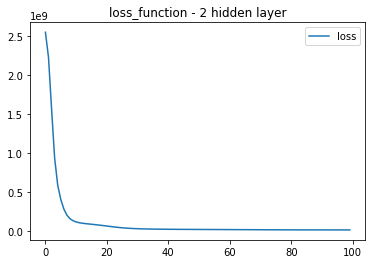

0.9924519049758224
0.9932610235856949


In [46]:
# Define the model - deep neural net 3X
number_input_features = 5
hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 5

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 2 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

## Predicting Number of Cases- with NN Model

In [50]:
# Check to make sure dtypes are appropriate .
df_cases_ml.dtypes

population                        float64
population_density                float64
median_age                        float64
ContainmentHealthIndex_updated    float64
StringencyIndex_updated           float64
total_cases_updated               float64
dtype: object

In [63]:
# Check shape before dropping na
df_cases_ml.shape

(48591, 6)

In [64]:
# Drop rows with null values
df_cases_ml=df_death_ml.dropna(how='any')
df_cases_ml.shape

(45075, 6)

In [65]:
# create features(X) and target(y) sets
X = df_cases_ml.drop(['total_cases_updated'],axis=1).values

y = df_cases_ml['total_cases_updated'].values
y = y.reshape(-1,1)

In [66]:
# Check shape for num of features
X.shape

(45075, 5)

In [67]:
# Split dataset into training and testing 
# train 90% of data, test 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 11        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
40567/40567 [==============================] - 1s 34us/sample - loss: 1792270377880.2295 - mean_squared_error: 1792270270464.0000
Epoch 2/300
40567/40567 [==============================] - 1s 33us/sample - loss: 1792039019979.4329 - mean_squared_error: 1792039190528.0000
Epoch 3/300
40567/40567 [==============================] - 1s 33us/sample - loss: 1791641466378.3367 - mean_squared_error: 1791641387008.0000
Epoch 4/300
40567/40567 [==============================] - 1s 34us/sample - loss: 17911166725

40567/40567 [==============================] - 1s 36us/sample - loss: 1632761088860.8093 - mean_squared_error: 1632760365056.0000
Epoch 53/300
40567/40567 [==============================] - 1s 29us/sample - loss: 1626976230565.9673 - mean_squared_error: 1626977337344.0000
Epoch 54/300
40567/40567 [==============================] - 1s 28us/sample - loss: 1621127299616.4236 - mean_squared_error: 1621126545408.0000
Epoch 55/300
40567/40567 [==============================] - 1s 28us/sample - loss: 1615206490052.8323 - mean_squared_error: 1615206285312.0000
Epoch 56/300
40567/40567 [==============================] - 1s 28us/sample - loss: 1609205342558.2607 - mean_squared_error: 1609205284864.0000
Epoch 57/300
40567/40567 [==============================] - 1s 28us/sample - loss: 1603127951365.6543 - mean_squared_error: 1603128655872.0000
Epoch 58/300
40567/40567 [==============================] - 1s 34us/sample - loss: 1596951640616.0466 - mean_squared_error: 1596952150016.0000
Epoch 59/300

40567/40567 [==============================] - 1s 32us/sample - loss: 1210992124219.0227 - mean_squared_error: 1210991902720.0000
Epoch 109/300
40567/40567 [==============================] - 1s 32us/sample - loss: 1202378882577.6570 - mean_squared_error: 1202379554816.0000
Epoch 110/300
40567/40567 [==============================] - 1s 26us/sample - loss: 1193766506383.4197 - mean_squared_error: 1193765109760.0000
Epoch 111/300
40567/40567 [==============================] - 1s 26us/sample - loss: 1185169815780.5427 - mean_squared_error: 1185169801216.0000
Epoch 112/300
40567/40567 [==============================] - 1s 28us/sample - loss: 1176541389956.4963 - mean_squared_error: 1176541462528.0000
Epoch 113/300
40567/40567 [==============================] - 1s 34us/sample - loss: 1167891651407.8853 - mean_squared_error: 1167891759104.0000
Epoch 114/300
40567/40567 [==============================] - 1s 35us/sample - loss: 1159239059125.6807 - mean_squared_error: 1159238385664.0000
Epoch 

40567/40567 [==============================] - 1s 33us/sample - loss: 756896438355.7537 - mean_squared_error: 756896169984.0000
Epoch 166/300
40567/40567 [==============================] - 1s 33us/sample - loss: 750322346660.3394 - mean_squared_error: 750322253824.0000
Epoch 167/300
40567/40567 [==============================] - 1s 33us/sample - loss: 743833077212.7998 - mean_squared_error: 743832813568.0000
Epoch 168/300
40567/40567 [==============================] - 1s 34us/sample - loss: 737425739956.6332 - mean_squared_error: 737425752064.0000
Epoch 169/300
40567/40567 [==============================] - 1s 33us/sample - loss: 731130980386.9857 - mean_squared_error: 731130757120.0000
Epoch 170/300
40567/40567 [==============================] - 1s 33us/sample - loss: 724866868543.4904 - mean_squared_error: 724866629632.0000
Epoch 171/300
40567/40567 [==============================] - 1s 33us/sample - loss: 718693170164.4644 - mean_squared_error: 718693466112.0000
Epoch 172/300
40567/

40567/40567 [==============================] - 1s 33us/sample - loss: 478392000861.9577 - mean_squared_error: 478392156160.0000
Epoch 223/300
40567/40567 [==============================] - 1s 33us/sample - loss: 474724091351.5494 - mean_squared_error: 474724106240.0000
Epoch 224/300
40567/40567 [==============================] - 1s 35us/sample - loss: 471103826200.9456 - mean_squared_error: 471104094208.0000
Epoch 225/300
40567/40567 [==============================] - 1s 35us/sample - loss: 467501629564.9994 - mean_squared_error: 467501678592.0000
Epoch 226/300
40567/40567 [==============================] - 2s 38us/sample - loss: 463907780265.0596 - mean_squared_error: 463907913728.0000
Epoch 227/300
40567/40567 [==============================] - 2s 40us/sample - loss: 460342254993.8305 - mean_squared_error: 460341673984.0000
Epoch 228/300
40567/40567 [==============================] - 1s 34us/sample - loss: 456813572481.1959 - mean_squared_error: 456813412352.0000
Epoch 229/300
40567/

40567/40567 [==============================] - 1s 35us/sample - loss: 301973400698.4499 - mean_squared_error: 301973209088.0000
Epoch 280/300
40567/40567 [==============================] - 1s 36us/sample - loss: 299409118982.1528 - mean_squared_error: 299409244160.0000
Epoch 281/300
40567/40567 [==============================] - 1s 36us/sample - loss: 296885802866.7952 - mean_squared_error: 296886075392.0000
Epoch 282/300
40567/40567 [==============================] - 1s 34us/sample - loss: 294390127028.5385 - mean_squared_error: 294390005760.0000
Epoch 283/300
40567/40567 [==============================] - 1s 36us/sample - loss: 291891150029.7491 - mean_squared_error: 291890954240.0000
Epoch 284/300
40567/40567 [==============================] - 1s 35us/sample - loss: 289389874515.9366 - mean_squared_error: 289389838336.0000
Epoch 285/300
40567/40567 [==============================] - 1s 36us/sample - loss: 286903839780.4245 - mean_squared_error: 286903992320.0000
Epoch 286/300
40567/

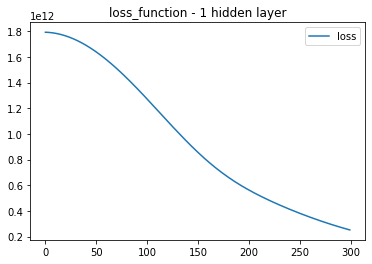

0.8367812825989898
0.8358289916469179


In [69]:
# define model - shallow neural net
number_hidden_nodes = 10
number_input_features = 5
epochs=300
nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train, epochs=epochs )

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 16        
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
40567/40567 [==============================] - 2s 37us/sample - loss: 1792277549349.6172 - mean_squared_error: 1792278134784.0000
Epoch 2/500
40567/40567 [==============================] - 1s 36us/sample - loss: 1792086220687.9248 - mean_squared_error: 1792082837504.0000
Epoch 3/500
40567/40567 [==============================] - 1s 35us/sample - loss: 1791712652288.1765 - mean_squared_error: 1791712034816.0000
Epoch 4/500
40567/40567 [==============================] - 1s 35us/sample - loss: 179120610

40567/40567 [==============================] - 1s 32us/sample - loss: 1644834346934.5452 - mean_squared_error: 1644835110912.0000
Epoch 54/500
40567/40567 [==============================] - 1s 33us/sample - loss: 1639626298894.9812 - mean_squared_error: 1639627096064.0000
Epoch 55/500
40567/40567 [==============================] - 1s 32us/sample - loss: 1634336438839.7979 - mean_squared_error: 1634337030144.0000
Epoch 56/500
40567/40567 [==============================] - 1s 33us/sample - loss: 1628950107810.7996 - mean_squared_error: 1628949708800.0000s - loss: 1596813605328.8835 
Epoch 57/500
40567/40567 [==============================] - 1s 32us/sample - loss: 1623461174234.0105 - mean_squared_error: 1623461593088.0000
Epoch 58/500
40567/40567 [==============================] - 1s 33us/sample - loss: 1617939765518.9497 - mean_squared_error: 1617940316160.0000
Epoch 59/500
40567/40567 [==============================] - 1s 33us/sample - loss: 1612383758884.3108 - mean_squared_error: 16

40567/40567 [==============================] - 1s 27us/sample - loss: 1267997066911.8716 - mean_squared_error: 1267996819456.0000
Epoch 109/500
40567/40567 [==============================] - 1s 30us/sample - loss: 1259931183725.0083 - mean_squared_error: 1259930779648.0000
Epoch 110/500
40567/40567 [==============================] - 1s 26us/sample - loss: 1251928408213.4338 - mean_squared_error: 1251928178688.0000
Epoch 111/500
40567/40567 [==============================] - 1s 27us/sample - loss: 1243870343762.8069 - mean_squared_error: 1243869085696.0000
Epoch 112/500
40567/40567 [==============================] - 1s 27us/sample - loss: 1235768019739.2805 - mean_squared_error: 1235767918592.0000s - loss: 1293029765929.674
Epoch 113/500
40567/40567 [==============================] - 1s 26us/sample - loss: 1227699493266.8149 - mean_squared_error: 1227700174848.0000
Epoch 114/500
40567/40567 [==============================] - 1s 28us/sample - loss: 1219630048989.8662 - mean_squared_error

40567/40567 [==============================] - 1s 29us/sample - loss: 820489595079.3628 - mean_squared_error: 820489879552.0000
Epoch 165/500
40567/40567 [==============================] - 1s 28us/sample - loss: 813150396491.7266 - mean_squared_error: 813150437376.0000
Epoch 166/500
40567/40567 [==============================] - 1s 28us/sample - loss: 805836176207.2794 - mean_squared_error: 805836423168.0000s - loss: 796696219753.2710 -
Epoch 167/500
40567/40567 [==============================] - 1s 27us/sample - loss: 798551555112.5642 - mean_squared_error: 798551506944.0000
Epoch 168/500
40567/40567 [==============================] - 1s 27us/sample - loss: 791373641948.0614 - mean_squared_error: 791374135296.0000
Epoch 169/500
40567/40567 [==============================] - 1s 27us/sample - loss: 784237842306.4957 - mean_squared_error: 784237985792.0000
Epoch 170/500
40567/40567 [==============================] - 1s 27us/sample - loss: 777133985800.5823 - mean_squared_error: 777134342

40567/40567 [==============================] - 1s 32us/sample - loss: 484597986746.7733 - mean_squared_error: 484598022144.0000
Epoch 222/500
40567/40567 [==============================] - 1s 34us/sample - loss: 480108260003.1277 - mean_squared_error: 480108249088.0000
Epoch 223/500
40567/40567 [==============================] - 1s 35us/sample - loss: 475683247513.1508 - mean_squared_error: 475683160064.0000
Epoch 224/500
40567/40567 [==============================] - 1s 35us/sample - loss: 471320621045.3983 - mean_squared_error: 471320920064.0000
Epoch 225/500
40567/40567 [==============================] - 1s 35us/sample - loss: 467010894596.1586 - mean_squared_error: 467011272704.0000
Epoch 226/500
40567/40567 [==============================] - 1s 35us/sample - loss: 462729567940.7755 - mean_squared_error: 462729609216.0000
Epoch 227/500
40567/40567 [==============================] - 1s 31us/sample - loss: 458458669861.3269 - mean_squared_error: 458458988544.0000
Epoch 228/500
40567/

40567/40567 [==============================] - 1s 26us/sample - loss: 284858279128.5023 - mean_squared_error: 284858318848.0000
Epoch 278/500
40567/40567 [==============================] - 1s 30us/sample - loss: 282107101744.3766 - mean_squared_error: 282107052032.0000
Epoch 279/500
40567/40567 [==============================] - 1s 33us/sample - loss: 279381396980.2750 - mean_squared_error: 279381409792.0000
Epoch 280/500
40567/40567 [==============================] - 1s 33us/sample - loss: 276653686361.9505 - mean_squared_error: 276653703168.0000s - loss: 268669066841.1609 - mean_squared_er
Epoch 281/500
40567/40567 [==============================] - 1s 33us/sample - loss: 273950512983.7356 - mean_squared_error: 273950457856.0000
Epoch 282/500
40567/40567 [==============================] - 1s 33us/sample - loss: 271287780527.6100 - mean_squared_error: 271287926784.0000
Epoch 283/500
40567/40567 [==============================] - 1s 33us/sample - loss: 268675166061.2924 - mean_squared_

40567/40567 [==============================] - 1s 27us/sample - loss: 168407546118.4683 - mean_squared_error: 168407482368.0000
Epoch 335/500
40567/40567 [==============================] - 1s 28us/sample - loss: 167031931634.4386 - mean_squared_error: 167031980032.0000s - loss: 151145316454.40
Epoch 336/500
40567/40567 [==============================] - 1s 27us/sample - loss: 165675310474.8636 - mean_squared_error: 165675204608.0000
Epoch 337/500
40567/40567 [==============================] - 1s 27us/sample - loss: 164334256896.5742 - mean_squared_error: 164334305280.0000
Epoch 338/500
40567/40567 [==============================] - 1s 27us/sample - loss: 163008087389.5791 - mean_squared_error: 163008167936.0000
Epoch 339/500
40567/40567 [==============================] - 1s 27us/sample - loss: 161707615461.2243 - mean_squared_error: 161707655168.0000
Epoch 340/500
40567/40567 [==============================] - 1s 28us/sample - loss: 160436420193.2203 - mean_squared_error: 160436371456.

40567/40567 [==============================] - 1s 30us/sample - loss: 118607339889.3438 - mean_squared_error: 118607355904.0000
Epoch 391/500
40567/40567 [==============================] - 1s 34us/sample - loss: 118165970280.2313 - mean_squared_error: 118166020096.0000
Epoch 392/500
40567/40567 [==============================] - 1s 37us/sample - loss: 117742941651.0058 - mean_squared_error: 117742845952.0000
Epoch 393/500
40567/40567 [==============================] - 1s 36us/sample - loss: 117325427995.6465 - mean_squared_error: 117325488128.0000
Epoch 394/500
40567/40567 [==============================] - 1s 36us/sample - loss: 116919323424.9347 - mean_squared_error: 116919296000.0000
Epoch 395/500
40567/40567 [==============================] - 1s 36us/sample - loss: 116527626079.6111 - mean_squared_error: 116527669248.0000
Epoch 396/500
40567/40567 [==============================] - 1s 35us/sample - loss: 116147516710.3997 - mean_squared_error: 116147478528.0000
Epoch 397/500
40567/

Epoch 447/500
40567/40567 [==============================] - 1s 36us/sample - loss: 106386372342.1997 - mean_squared_error: 106386317312.0000
Epoch 448/500
40567/40567 [==============================] - 1s 36us/sample - loss: 106295959345.8218 - mean_squared_error: 106296016896.0000
Epoch 449/500
40567/40567 [==============================] - 1s 37us/sample - loss: 106207688150.8426 - mean_squared_error: 106207682560.0000
Epoch 450/500
40567/40567 [==============================] - 1s 37us/sample - loss: 106121509268.0265 - mean_squared_error: 106121379840.0000
Epoch 451/500
40567/40567 [==============================] - 1s 34us/sample - loss: 106036928639.8265 - mean_squared_error: 106036969472.0000
Epoch 452/500
40567/40567 [==============================] - 1s 36us/sample - loss: 105953261347.4337 - mean_squared_error: 105953222656.0000
Epoch 453/500
40567/40567 [==============================] - 1s 36us/sample - loss: 105871146813.3322 - mean_squared_error: 105871212544.0000
Epoch 

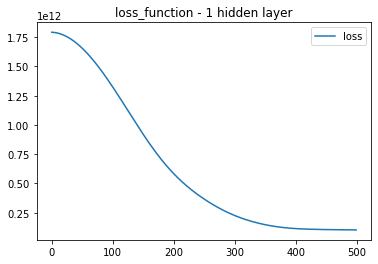

0.9329562775618563
0.932200283707717


In [70]:
# define model - shallow neural net 3X
number_hidden_nodes = 15
number_input_features = 5
epochs=500
nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train, epochs=epochs )

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))